In [1]:
import time, os
import numpy as np
import pandas as pd
from model import LSTM_model
from get_dataset_new import IMU_dataset
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
#PARAMETER
created_time = int(time.time())

epochs = 10
frame_len = 20
batch_size = 64
lr = 0.0001
loss = 'categorical_crossentropy'
dataset_dir = 'dataset_new'

In [3]:
#LOAD DATASET
data = IMU_dataset(dataset_dir)
pose_list = os.listdir('./' + dataset_dir)

x_data, y_data, y_list = data.Sequence_data(frame_len)

print(x_data)
x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)
y_data = to_categorical(y_data, len(pose_list))
print(np.shape(x_data))

X_train, X_test, Y_train, Y_test = train_test_split(x_data, y_data, random_state = 2022)


print(np.shape(x_data), np.shape(y_data))

[[[ 0.45967511 -1.         -0.27302667 -0.46941629  0.35959154
    0.45860568]
  [ 0.45913444 -0.99977378 -0.28175803 -0.46871725  0.37345002
    0.46187366]
  [ 0.45856926 -0.99953732 -0.29088513 -0.46696963  0.41648431
    0.50000002]
  ...
  [-0.90820864 -0.96873924 -0.75311178 -0.90562745 -0.34865062
   -0.65250552]
  [-0.96099439 -0.97291883 -0.87144759 -0.94687174 -0.54631653
   -0.84422662]
  [-1.         -0.97602736 -1.         -1.         -0.65937272
   -1.        ]]

 [[ 0.45913444 -1.         -0.2558485  -0.45273463  0.37345002
    0.436214  ]
  [ 0.45856926 -0.99976348 -0.2641363  -0.45104659  0.41648431
    0.47222222]
  [ 0.45801233 -0.9995304  -0.27230323 -0.45476029  0.42231946
    0.51851853]
  ...
  [-0.96099439 -0.97313897 -0.79131217 -0.91458469 -0.54631653
   -0.79732512]
  [-1.         -0.9762482  -0.90804333 -0.96590135 -0.65937272
   -0.94444441]
  [-0.91451119 -0.98568817 -1.         -1.         -0.65937272
   -1.        ]]

 [[ 0.45856926 -1.         -0.243966

In [4]:
print(y_list)

['running.csv', 'Sitting_on_chair.csv', 'Sit_to_stand.csv', 'standing.csv', 'walking.csv']


In [5]:
num_degree = np.shape(x_data)[-1]
num_pose = len(os.listdir('./'+dataset_dir))

In [6]:
model = LSTM_model(num_degree, num_pose)
model.summary()
plot_model(model, show_shapes=True)

TypeError: attention_3d_block() missing 1 required positional argument: 'inputs'

In [ ]:
#MODEL COMPILE
model.compile(
    optimizer=Adam(learning_rate=lr),
    loss=loss,
    metrics=['acc'])

In [ ]:
#EARLY STOPPING
cb = EarlyStopping(
    monitor='val_loss', min_delta=0.0001, patience=5, verbose=1, mode='min',
    baseline=None, restore_best_weights=True
)

In [ ]:
x_train, x_val, y_train, y_val, = train_test_split(x_data, y_data, test_size=0.2, random_state=2022)

In [ ]:
#TRAIN
history = model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_val, y_val),
    callbacks=[cb]
)

Epoch 1/10
1715/1715 [==============================] - 216s 123ms/step - loss: 0.1516 - acc: 0.9602 - val_loss: 0.0252 - val_acc: 0.9929
Epoch 2/10
1715/1715 [==============================] - 129s 75ms/step - loss: 0.0311 - acc: 0.9909 - val_loss: 0.0223 - val_acc: 0.9933
Epoch 3/10
1715/1715 [==============================] - 116s 68ms/step - loss: 0.0241 - acc: 0.9926 - val_loss: 0.0139 - val_acc: 0.9962
Epoch 4/10
1715/1715 [==============================] - 115s 67ms/step - loss: 0.0210 - acc: 0.9937 - val_loss: 0.0120 - val_acc: 0.9970
Epoch 5/10
1715/1715 [==============================] - 118s 69ms/step - loss: 0.0185 - acc: 0.9943 - val_loss: 0.0089 - val_acc: 0.9973
Epoch 6/10
1715/1715 [==============================] - 112s 66ms/step - loss: 0.0174 - acc: 0.9947 - val_loss: 0.0108 - val_acc: 0.9970
Epoch 7/10
1715/1715 [==============================] - 107s 63ms/step - loss: 0.0151 - acc: 0.9953 - val_loss: 0.0082 - val_acc: 0.9972
Epoch 8/10
1715/1715 [==================

In [ ]:
os.mkdir(f"models/{created_time}_{loss}_{lr}_{batch_size}")
model.save(f'models/{created_time}_{loss}_{lr}_{batch_size}/exercise_model.h5')

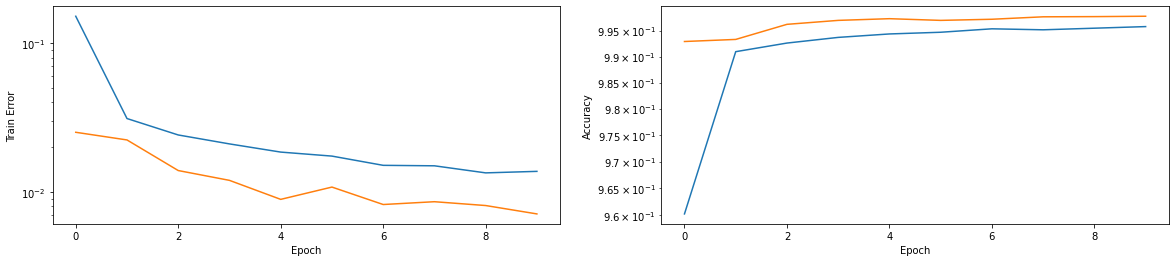

In [ ]:
#PLT
plt.figure(figsize=(20,4), facecolor='white')
plt.subplot(1,2,1)
pd.Series(history.history['loss']).plot(logy=True)
pd.Series(history.history['val_loss']).plot(logy=True)
plt.xlabel("Epoch")
plt.ylabel("Train Error")

plt.subplot(1,2,2)
pd.Series(history.history['acc']).plot(logy=True)
pd.Series(history.history['val_acc']).plot(logy=True)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.savefig(f"models/{created_time}_{loss}_{lr}_{batch_size}/train_error.png")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

label_pre = model.predict([x_val])


# #Create confusion matrix and normalizes it over predicted (columns)
# label = np.argmax(label_val, axis = 1)

label_pre = np.round(label_pre,0)
# result = confusion_matrix(y_val, label_pre)
# print(result)

print(label_pre)
# import seaborn as sns
# from matplotlib.colors import LogNorm, Normalize
# plt.figure(facecolor='white')
# ax = sns.heatmap(result, annot=True,fmt='d',cmap='Blues',norm=LogNorm())
# plt.title('Heatmap', fontsize=20)
# plt.savefig(f"model/{created_time}_{loss}_{lr}_{batch_size}/heatmap.png")
# plt.show()

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]
